<a href="https://colab.research.google.com/github/YassineH2j/TP_Machine_Learning/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [10]:
D = pandas.read_csv('/content/Iris.csv', header=0)
D.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


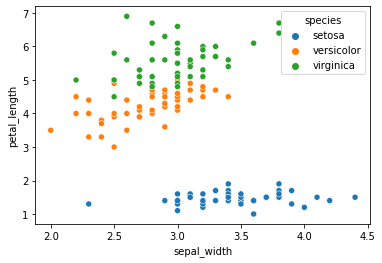

In [12]:
sns.scatterplot(x='sepal_width', y ='petal_length' , data = df , hue = 'species')
plt.show()

In [14]:
D.loc[D["Species"] == "Iris-setosa" , "Species"] = 0
D.loc[D["Species"] == "Iris-versicolor" , "Species"] = 1
D.loc[D["Species"] == "Iris-virginica" , "Species"] = 2
D.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [19]:
X_data = D.iloc[:,1:5].values
Y_data=D.iloc[:,5].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, shuffle = True, random_state = 123)
print("Dimensions de la base d'apprentissage: \n")
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Dimensions de la base d'apprentissage: \n")
print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

Dimensions de la base d'apprentissage: 

X_train shape: (105, 4)
Y_train shape: (105,)
Dimensions de la base d'apprentissage: 

X_test shape: (45, 4)
Y_test shape: (45,)


In [20]:
print("\n 10 premières données d’apprentissage:\n")
print("X_train")
print(X_train[0:10])
print("Y_train")
print(Y_train[0:10])


 10 premières données d’apprentissage:

X_train
[[5.8 2.8 5.1 2.4]
 [6.3 3.4 5.6 2.4]
 [5.5 2.3 4.  1.3]
 [5.1 3.8 1.5 0.3]
 [4.4 3.  1.3 0.2]
 [6.5 3.2 5.1 2. ]
 [5.1 3.3 1.7 0.5]
 [4.9 3.1 1.5 0.1]
 [6.7 3.1 4.7 1.5]
 [6.1 3.  4.6 1.4]]
Y_train
[2 2 1 0 0 2 0 0 1 1]


In [21]:
print("\n 10 premières données de test:\n")
print("X_test")
print(X_test[0:10])
print("Y_test")
print(Y_test[0:10])


 10 premières données de test:

X_test
[[6.3 2.5 4.9 1.5]
 [6.8 3.  5.5 2.1]
 [6.4 2.8 5.6 2.2]
 [5.6 3.  4.1 1.3]
 [4.9 3.1 1.5 0.1]
 [6.  3.  4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [4.4 3.2 1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [5.5 2.6 4.4 1.2]]
Y_test
[1 2 2 1 0 2 1 0 0 1]


In [23]:
classifier = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(3,3), epsilon=0.07, max_iter=1500)
classifier.fit(X_train, Y_train.astype('int'))

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(3, 3), max_iter=1500,
              solver='lbfgs')

In [25]:
prediction = classifier.predict(X_test)
print('Y_test \n',Y_test)

Y_test 
 [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [26]:
print ('Prédiction \n',prediction)
print("accuracy of the perception: \n",metrics.accuracy_score(prediction,Y_test.astype('int')))

Prédiction 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
accuracy of the perception: 
 0.2222222222222222


In [31]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 6.8 MB/s 
     |████████████████████████████████| 9.4 MB 59.1 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 117 kB 61.4 MB/s 
     |████████████████████████████████| 199 kB 59.7 MB/s 
     |████████████████████████████████| 41 kB 607 kB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 295 kB 61.7 MB/s 
     |████████████████████████████████| 965 kB 61.1 MB/s 
     |████████████████████████████████| 8.8 MB 47.1 MB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
     |████████████████████████████████| 468 kB 61.0 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=a0665e2dd0a5eb31f6492fcb22abfd3d1562c72ff91b99161ba227eeae85bdb2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

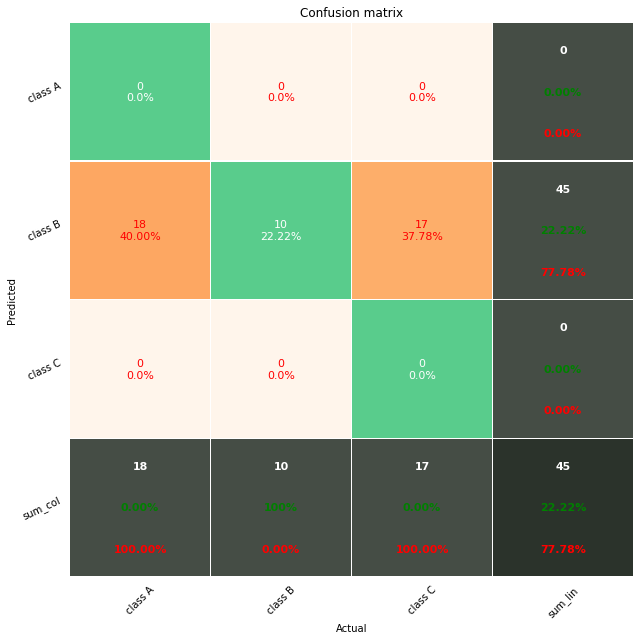

In [32]:
from pretty_confusion_matrix import pp_matrix_from_data
cmap= "PuRd"
pp_matrix_from_data(Y_test.astype('int'),prediction) 

constant learning-rate 0.2  :  0.38095238095238093
constant learning-rate 0.7  :  0.38095238095238093
inv-scaling learning-rate 0.2  :  0.9809523809523809
inv-scaling learning-rate 0.7  :  0.6952380952380952
adam  :  0.9904761904761905


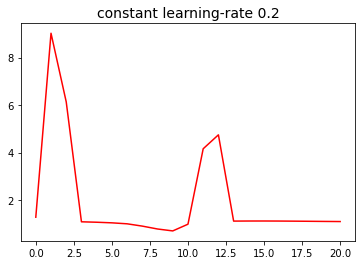

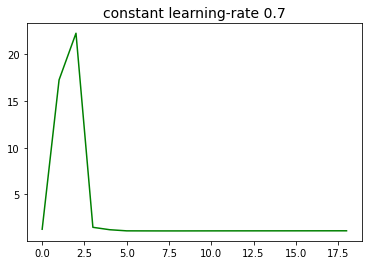

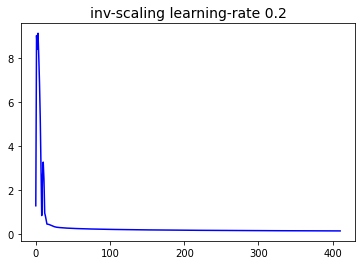

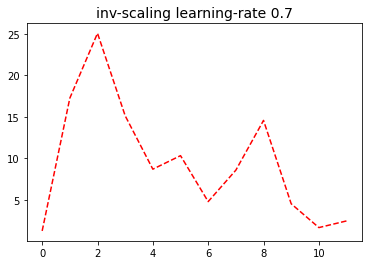

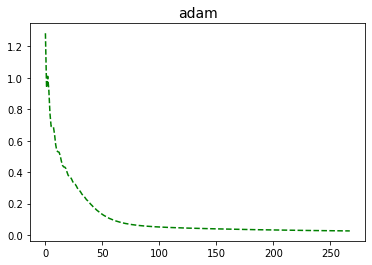

In [50]:
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.2,
        "max_iter" : 1500
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "learning_rate_init": 0.7,
        "max_iter" : 1500
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.2,
        "max_iter" : 1500
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "learning_rate_init": 0.7,
        "max_iter" : 3000
    },
    {
        "solver": "adam", "learning_rate_init": 0.01,
        "max_iter" : 3000,
    }
]
labels = [
    "constant learning-rate 0.2",
    "constant learning-rate 0.7",
    "inv-scaling learning-rate 0.2",
    "inv-scaling learning-rate 0.7",
    "adam",
]
dataClassifiers = []

for i in range(len(params)):
  classifier = MLPClassifier(random_state=0, **params[i])
  classifier.fit(X_train, Y_train.astype('int'))
  print(labels[i]," : ",classifier.score(X_train, Y_train.astype('int')))
  dataClassifiers.append(classifier)

  plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]

for i in range(len(dataClassifiers)):
  plt.plot(dataClassifiers[i].loss_curve_, **plot_args[i])
  plt.title(labels[i], fontsize=14)
  plt.show()